1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Determine the cluster number
    3. a. Use elbow method as baseline
    3. b. Apply other methods to compare with elbow
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable clustering model for this problem.
5. Visualize your cluster in 2D or 3D to compare the result.
6. Measure performance of your clustering model.
7. Conclusion and Discussion (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

| Biến                        | Mô tả                                                                 |
|-----------------------------|----------------------------------------------------------------------|
| `BALANCE`                   | Số dư còn lại trong tài khoản để thực hiện mua sắm                  |
| `BALANCE_FREQUENCY`         | Tần suất cập nhật số dư, giá trị từ 0 đến 1 (1 = cập nhật thường xuyên) |
| `PURCHASES`                 | Tổng số tiền đã mua sắm từ tài khoản                                |
| `ONEOFF_PURCHASES`          | Giá trị lớn nhất của một lần mua hàng đơn lẻ                        |
| `INSTALLMENTS_PURCHASES`    | Tổng giá trị mua hàng theo hình thức trả góp                        |
| `CASH_ADVANCE`              | Số tiền mặt được ứng trước bởi người dùng                           |
| `PURCHASES_FREQUENCY`       | Tần suất thực hiện các giao dịch mua sắm (0 đến 1)                  |
| `ONEOFF_PURCHASES_FREQUENCY`| Tần suất thực hiện các giao dịch mua đơn lẻ (0 đến 1)               |
| `PURCHASES_INSTALLMENTS_FREQUENCY` | Tần suất mua hàng trả góp (0 đến 1)                          |
| `CASH_ADVANCE_FREQUENCY`    | Tần suất ứng trước tiền mặt (0 đến 1)                               |
| `CASH_ADVANCE_TRX`          | Số lượng giao dịch ứng trước tiền mặt                               |
| `PURCHASES_TRX`             | Số lượng giao dịch mua hàng                                         |
| `CREDIT_LIMIT`              | Hạn mức tín dụng của thẻ đối với người dùng                         |
| `PAYMENTS`                  | Tổng số tiền người dùng đã thanh toán                               |
| `MINIMUM_PAYMENTS`          | Khoản thanh toán tối thiểu người dùng đã trả                        |
| `PRC_FULL_PAYMENT`          | Tỷ lệ phần trăm thanh toán toàn bộ nợ                              |
| `TENURE`                    | Thời gian sử dụng thẻ tín dụng của người dùng                       |


**Chỉ dùng các features trên để phân cụm**

# Load Dataset

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Clustered_Customer_Data.csv")

In [4]:
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


# Data Analysis

In [5]:
# Kiểm tra kích thước dữ liệu
df.shape

(8950, 19)

In [6]:
# Kiểm tra dữ liệu khuyết
df.isnull().sum()

Unnamed: 0                          0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Cluster                             0
dtype: int64

In [7]:
# Kiểm tra dữ liệu trùng lặp
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,4474.500000,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318,1.442011
std,2583.786788,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331,1.373951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,2237.250000,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,0.000000
50%,4474.500000,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000,2.000000
75%,6711.750000,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000,3.000000
max,8949.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,3.000000


In [9]:
df.dtypes

Unnamed: 0                            int64
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
Cluster                               int64
dtype: object

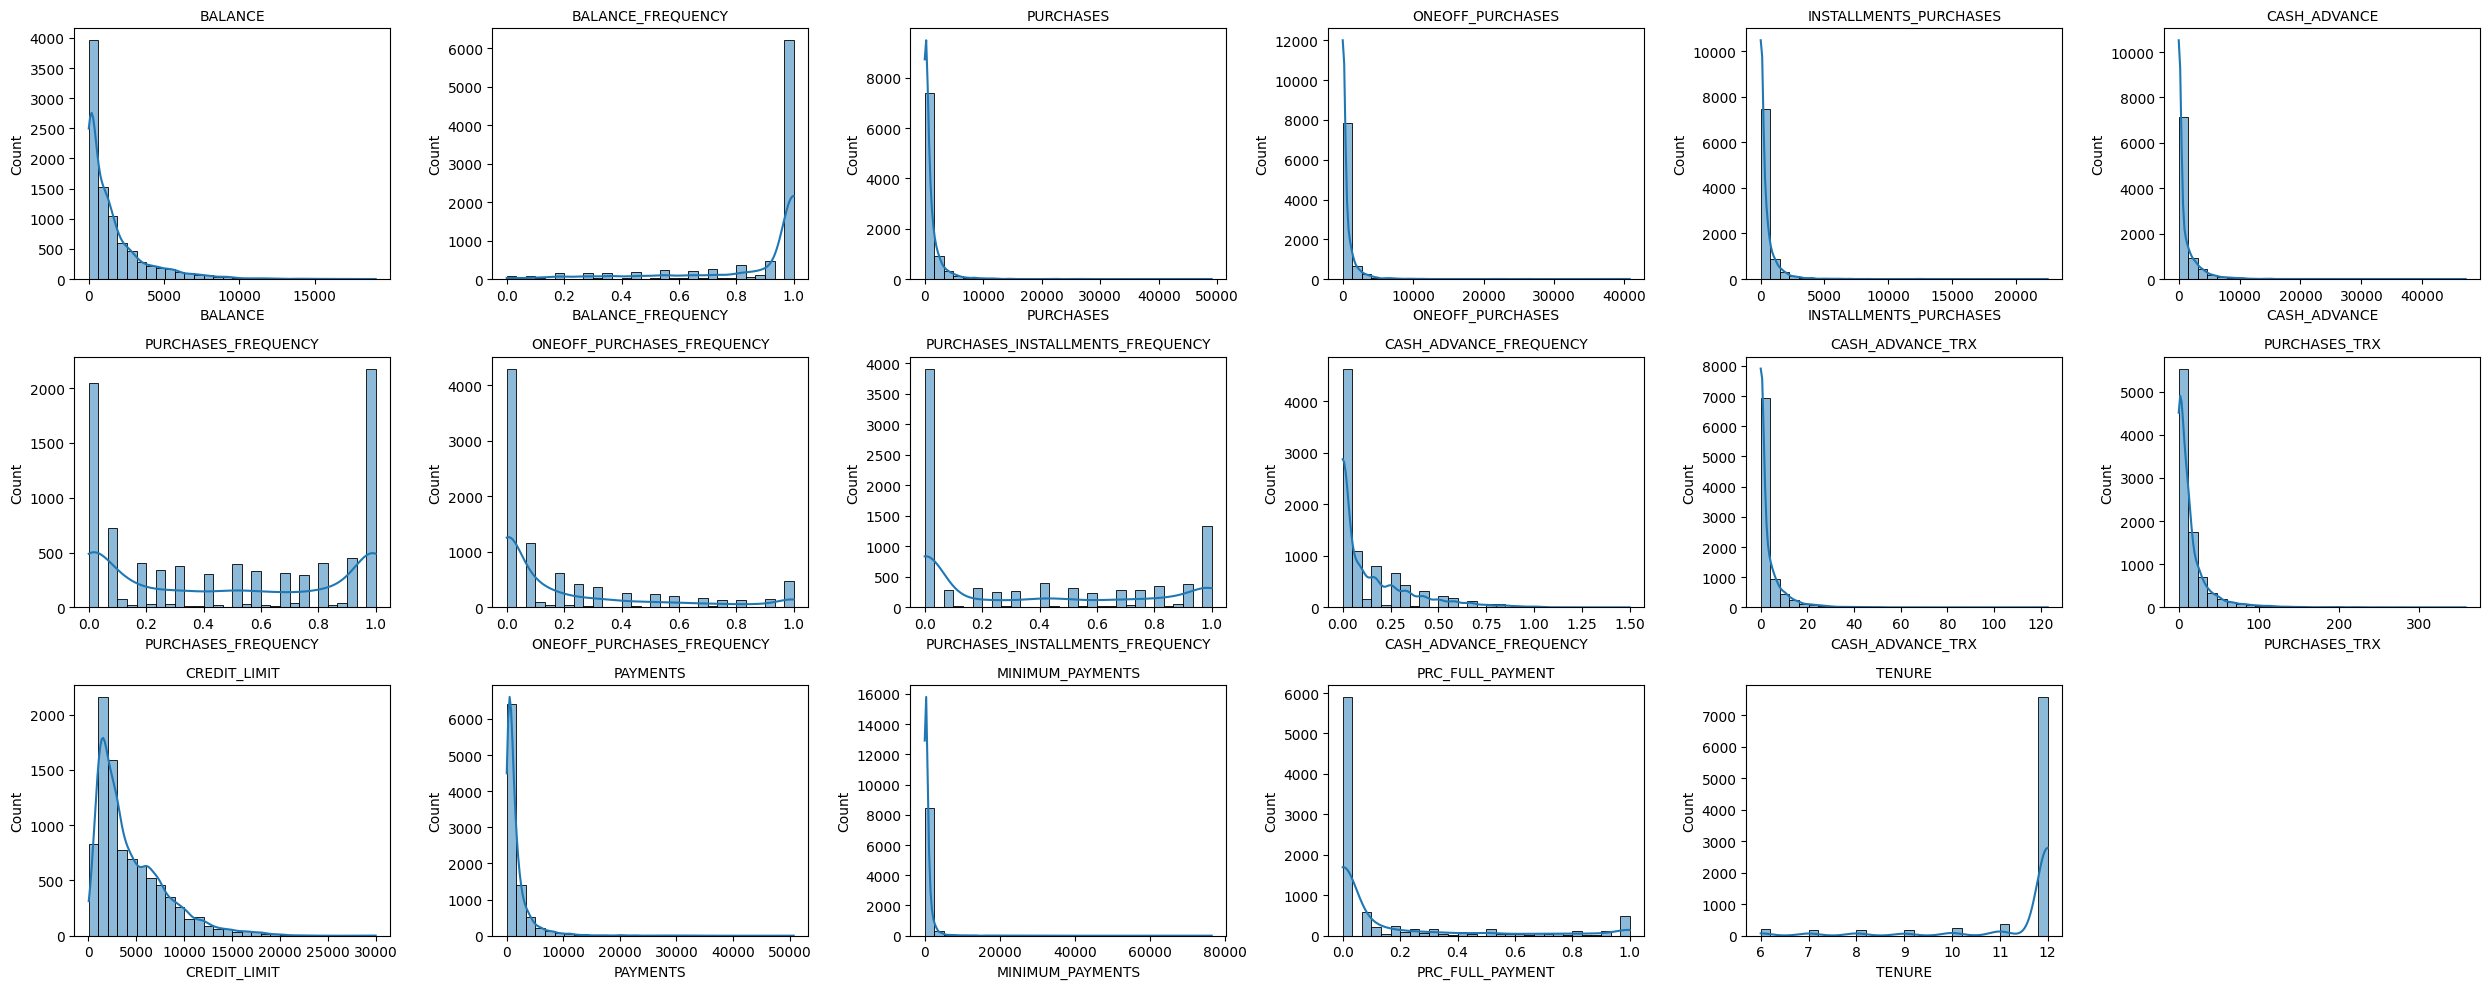

In [10]:
# Vẽ histogram cho tất cả feature
numerical_cols = df.drop(columns=['Cluster', 'Unnamed: 0'])
fig, axes = plt.subplots(3, 6, figsize=(25, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols.columns):
    sns.histplot(numerical_cols[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(col, fontsize=10)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [11]:
cluster_summary = df.groupby('Cluster')[[
    'BALANCE',
    'PURCHASES',
    'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE',
    'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY'
]].mean().round(2)

cluster_summary

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY
Cluster,,,,,,,,
0,1011.75,269.97,209.85,60.39,595.76,0.17,0.09,0.11
1,3551.15,7681.62,5095.88,2587.21,653.64,0.95,0.74,0.07
2,4602.46,501.90,320.37,181.61,4520.72,0.29,0.14,0.48
3,894.91,1236.18,593.97,642.48,210.57,0.89,0.30,0.04


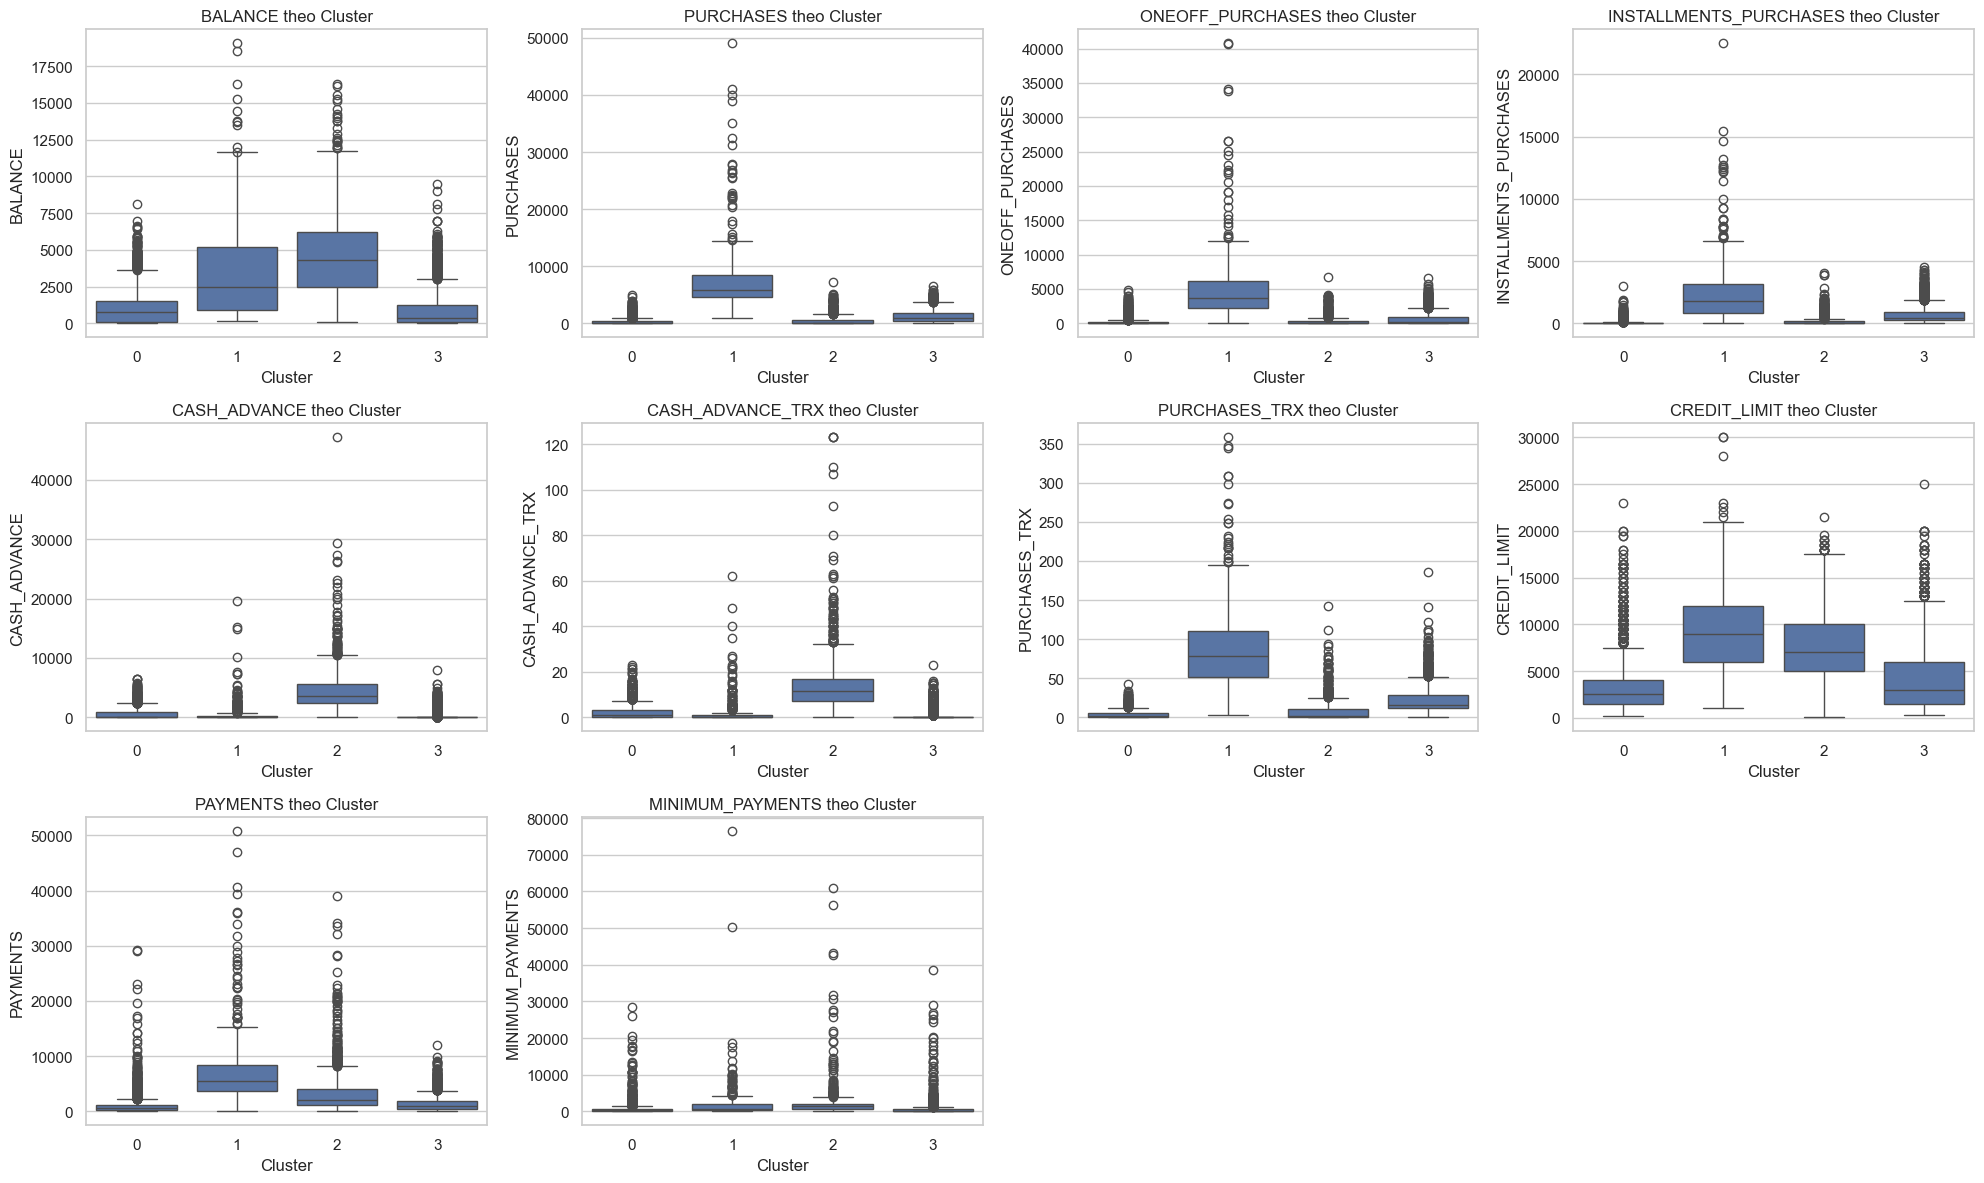

In [12]:
sns.set(style='whitegrid')

features_to_plot = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
                    'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

# Tạo các boxplot
fig, axes = plt.subplots(3, 4, figsize=(20, 12))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    sns.boxplot(x='Cluster', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'{feature} theo Cluster', fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Data Preprocessing

In [13]:
# Loại bỏ cột 'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

In [14]:
# Remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [15]:
outlier_cols = numerical_cols[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
                              'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']]
cleaned_df = df.copy()
for col in outlier_cols:
    cleaned_df = remove_outliers(cleaned_df, col)
# Kiểm tra lại dữ liệu sau khi loại bỏ outliers
print("Data shape after removing outliers:", cleaned_df.shape)

Data shape after removing outliers: (3935, 18)


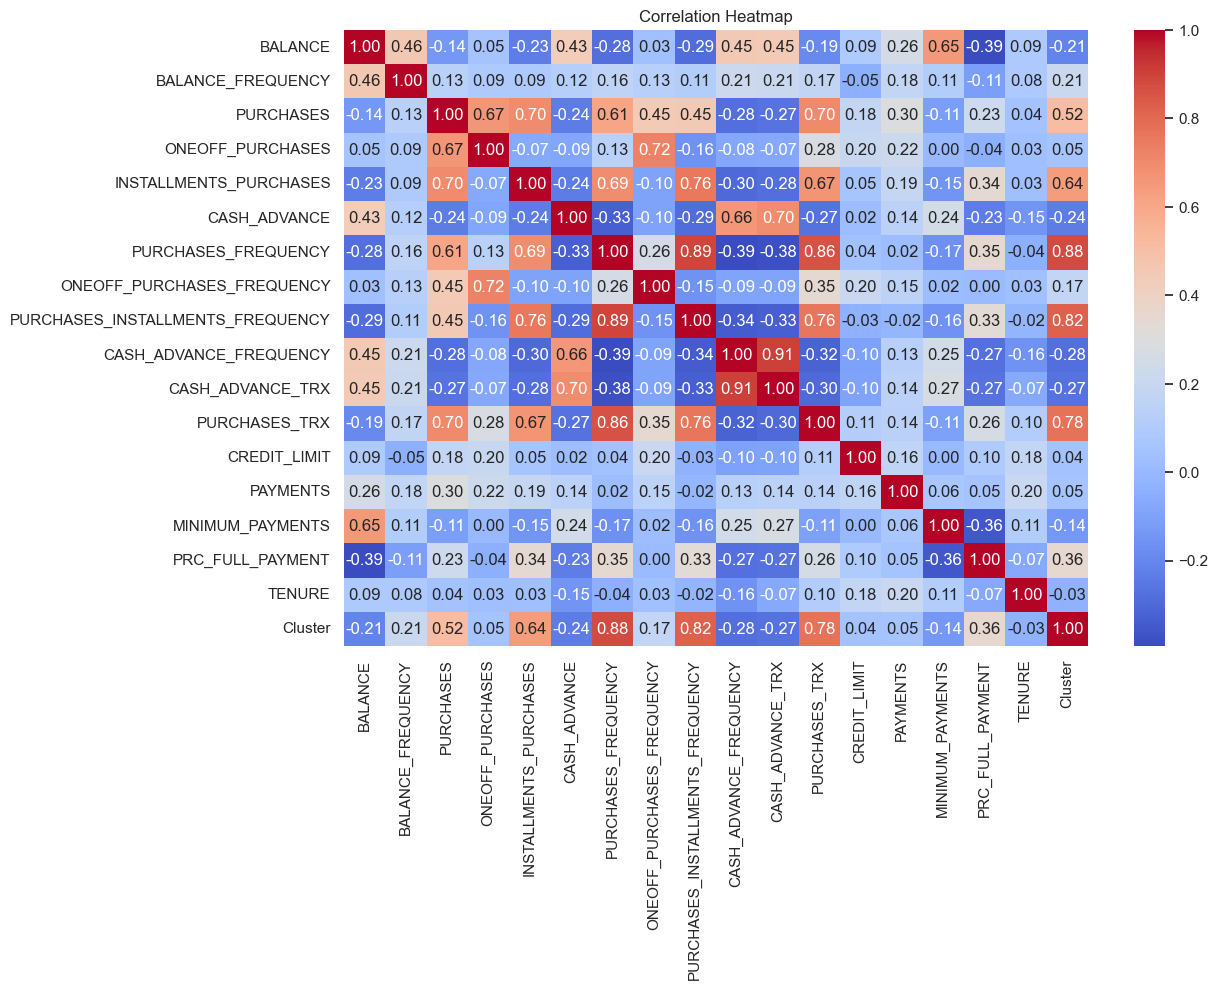

In [18]:
# Plot heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(cleaned_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering

In [20]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(cleaned_df.drop(columns=['Cluster']))

# Model Part

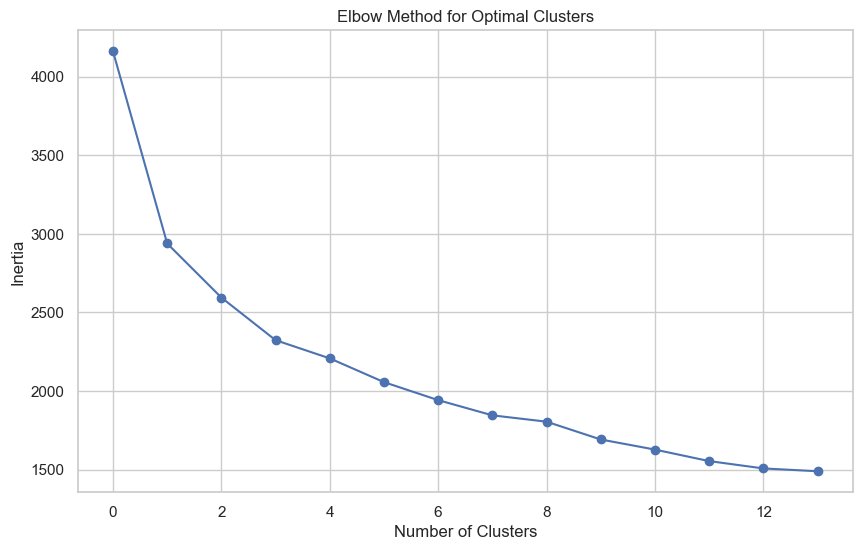

In [22]:
# Using elbow method to find optimal number of clusters
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks()
plt.grid(range(1, 15))
plt.show()

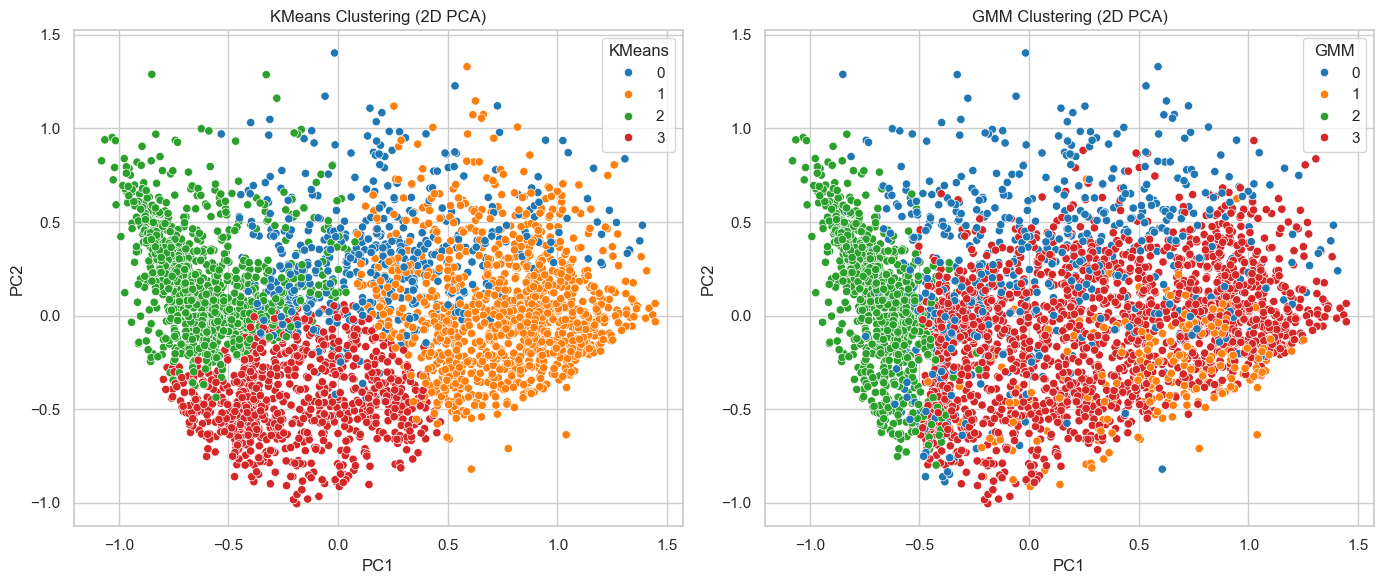

In [30]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# GMM clustering
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(scaled_data)

# Reduce to 2D for visualization using PCA
pca = PCA(n_components=2, random_state=42)
scaled_data_2d = pca.fit_transform(scaled_data)

# Tạo DataFrame để trực quan hóa
plot_df = pd.DataFrame(scaled_data_2d, columns=["PC1", "PC2"])
plot_df["KMeans"] = kmeans_labels
plot_df["GMM"] = gmm_labels

# Vẽ biểu đồ 2D cho KMeans và GMM
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=plot_df, x="PC1", y="PC2", hue="KMeans", palette="tab10", ax=axes[0])
axes[0].set_title("KMeans Clustering (2D PCA)")

sns.scatterplot(data=plot_df, x="PC1", y="PC2", hue="GMM", palette="tab10", ax=axes[1])
axes[1].set_title("GMM Clustering (2D PCA)")

plt.tight_layout()
plt.show()

# Discussion & Conclusion